# Utilisation de la bibliothèque SymPy (calcul formel sous Python)

La documentation complète sur le site offciel de la [librairie SymPy](https://docs.sympy.org/latest/index.html).  
Un double clique sur une cellule de texte permet de la modifier, pour l'écriture en markdown voir la documentation sur le [site Markdown](https://www.markdownguide.org/basic-syntax/).  
*Pour ceux qui connaisse les commandes [$\LaTeX$](https://www.latex-project.org/help/documentation/amsldoc.pdf), il est possible d'écrire directement des formules mathématiques.*  
  
Pour valider une cellule il faut faire : "Shift + Entrée" :  

 ![Shift+Entrée](http://www.contractortalk.com/attachments/f16/39518d1291837912-cleaning-up-another-carpenters-mess-enter-key.jpg)  

## Importation de la librairie SymPy :

Avant de commencer, il faut importer la librairie SymPy, les fonctions de cette librairie auront comme préambul "sp"

In [1]:
import sympy as sp

Par exemple, la fonction cosinus de SymPy est appelée via la commande :

In [2]:
sp.cos(10)

cos(10)

Pour avoir une sortie type $\LaTeX$ (plus facile à lire), il faut appeler la fonction (suivant les version, cette option est appelé par defaut) :

In [3]:
sp.init_printing()

In [4]:
sp.cos(10)

## Définition des variables et fonctions

La définition des variables symboliques se fait de la manière suivante :

In [5]:
a , b1 , nu, t = sp.symbols('a,b_1,nu,t')

In [6]:
display(a , b1 , nu, t)

Pour les fonctions, la synthaxe est identique mais on ajoute l'option "cls=Function" :

In [8]:
th, f, g = sp.symbols('theta, f, g',cls=sp.Function)
display(th(t),f(t),g(nu))

## Définition d'un vecteur

### Première possibilité

Un vecteur peut être défini comme une matrice d'une ligne (ou colonne) :

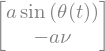

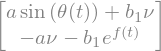

In [9]:
OA=a*sp.Matrix([sp.sin(th(t)),-nu])
OB=OA + b1*sp.Matrix([nu,-sp.exp(f(t))])
display(OA,OB)

Pour les opérations comme le produit scalaire, il faut être vigilant sur l'ordre des vecteurs, on pourra transposer le vecteur avec la fonction "T" :

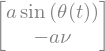

In [10]:
display(OA,OA.T)

### Seconde possibilité

On importe le sous module "vector" de la librairie sympy :

In [14]:
from sympy.vector import CoordSys3D

Il faut définir le nom du repère (i,j,k) :

In [15]:
O=CoordSys3D('O')

On peut ainsi définir les vecteur en fonction du repère :

In [16]:
OAo=a*(sp.sin(th(t))*O.i-nu*O.j)
OBo=OAo + b1*(nu*O.i-sp.exp(f(t))*O.j)
display(OAo)
display(OBo)

## Opérations

Les opérateurs de base sont pour :
- l'addition : "+"
- la soustraction : "-" 
- la multiplication : "*" 
- la puissance : "**"

In [17]:
display(41.+1,43.-1,21*2.,(-42**0.5)**2)

### Dérivée

Suivant une variable :

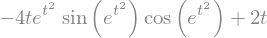

In [18]:
sp.diff(t**2+sp.cos(sp.exp(t**2))**2,t)

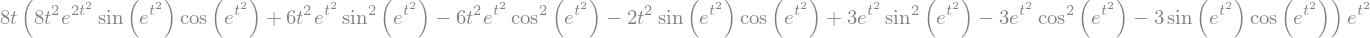

In [19]:
sp.diff(t**2+sp.cos(sp.exp(t**2))**2,t,3)

Suivant plusieurs variables :

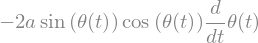

In [20]:
sp.diff(a*b1*sp.cos(th(t))**2,b1,t)

### Integrale

In [21]:
sp.integrate(a*sp.exp(t**2),(t,0,1),(a,0,10))

### Produit scalaire

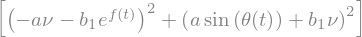

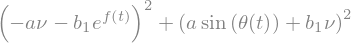

In [22]:
display(OB.T*OB)
display(OBo.dot(OBo))

### Résolution de système d'équation

In [25]:
Expr=[2*a+b1-nu,nu+b1]
Resu=sp.linsolve(Expr,b1, nu)
display(Resu)
display(Resu.args[0][0])

### Simplifications

In [26]:
sp.simplify(t**2+2*t+1)

In [27]:
sp.factor(t**2+2*t+1)

In [28]:
sp.expand((t+1)**5)

### Divers

Pour remplacer une variable on utilise la fonction "subs" :

In [29]:
E1=(a+b1)**2
display(E1)
E1=E1.subs(a,2*b1)
display(E1)
E1=E1.subs([(b1,-a),(a,b1-a)])
display(E1)
display(sp.simplify(E1))

# Exemple d'application

*Nous allons traiter l'exemple du double pendule libre suivant :*

 ![Double pendule](https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.vetopsy.fr%2Fmecanique-quantique%2Fimages%2Fdouble-pendule.jpg&f=1&nofb=1)

Importation des librairies et définitions des variables et fonctions :

In [30]:
import sympy as sp
from sympy.vector import CoordSys3D
O=CoordSys3D('O')
l1, l2, m1, m2, t, g = sp.symbols('l1, l2, m1, m2, t, g')
th1, th2 = sp.symbols('theta1, theta2',cls=sp.Function)

## Définition des vecteurs liés aux masses ponctuelles

In [31]:
O=CoordSys3D('O')
OM1=l1*(sp.sin(th1(t))*O.i-sp.cos(th1(t))*O.j)
OM2=sp.simplify(OM1 + l2*(sp.sin(th2(t))*O.i-sp.cos(th2(t))*O.j))
display("OM1 :" , OM1,"OM2 :" , OM2)

'OM1 :'

'OM2 :'

## Calcul de l'énergie cinétique

'Energie cinétique :'

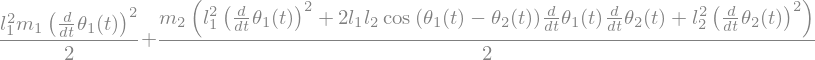

In [32]:
Ec=(m1*sp.diff(OM1,t).dot(sp.diff(OM1,t))+m2*sp.diff(OM2,t).dot(sp.diff(OM2,t)))/2
Ec=sp.simplify(Ec)
display("Energie cinétique :" , Ec)

Hypothèse des petites perturbations :  
$\theta_1 \approx 0$  
$\theta_2 \approx 0$  
$\theta_1$ et $\theta_2$ $\ll$ $\dot{\theta_1}$ et $\dot{\theta_2}$  


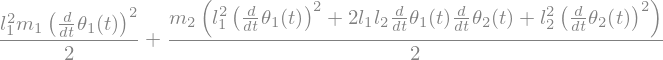

In [33]:
Ec=Ec.subs(([(sp.cos(th1(t)-th2(t)),1)]))
display(Ec)

On notera pour simplifier les écritures : 

In [34]:
dth1 =sp.diff(th1(t),t)
dth2 =sp.diff(th2(t),t)

Matrice de masse :

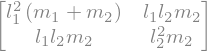

In [35]:
M=sp.Matrix([[sp.diff(Ec,dth1,dth1),sp.diff(Ec,dth1,dth2)],
            [sp.diff(Ec,dth2,dth1),sp.diff(Ec,dth2,dth2)]])
display(M)

## Calcul de l'énergie potentielle

In [36]:
Ep=g*(m1*(OM1-OM1.subs(th1(t),0)).dot(O.j)+m2*(OM2-OM2.subs(([(th1(t),0), (th2(t),0)]))).dot(O.j))
Ep=sp.simplify(Ep)
display("Energie potentielle :" , Ep)

'Energie potentielle :'

Hypothèse des petites perturbations :

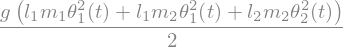

In [37]:
Ep=Ep.subs(([
   (sp.cos(th1(t)),1-th1(t)**2/2), 
    (sp.cos(th2(t)),1-th2(t)**2/2)]))
Ep=sp.simplify(Ep)
display(Ep)

Matrice de raideur :

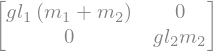

In [38]:
K=sp.Matrix([[sp.diff(Ep,th1(t),th1(t)),sp.diff(Ep,th1(t),th2(t))],
            [sp.diff(Ep,th2(t),th1(t)),sp.diff(Ep,th2(t),th2(t))]])
display(K)

## Calcul des valeurs propres et vecteurs propres :

Les valeurs propres sont obtenues par la fonction "eigenvals()".  
Le résultats est donné sous la forme $\left\lbrace  \right.$ *valeur propre $\colon$ nombre d'occurence de la valeur propre* $\left. \right\rbrace  $ :

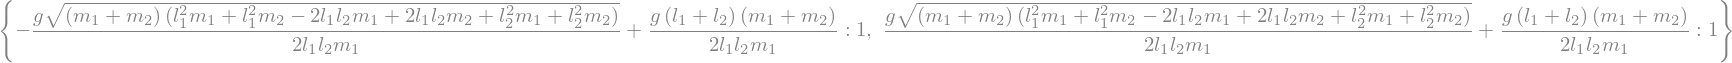

In [39]:
ValProp=(M**-1*K).eigenvals()
display(ValProp)

Les vecteurs propres sont obtenus avec la fonction "eigenvects()" :

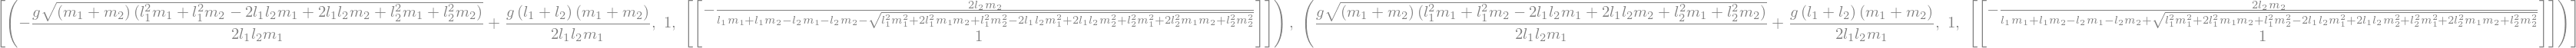

In [40]:
VectProp=(M**-1*K).eigenvects()
display(VectProp)

Le résultat est donné sous la forme : *valeur propre, nombre d'occurence, vecteur propre*
Les résultats sont accessibles via :
- Pour les valeurs propres :

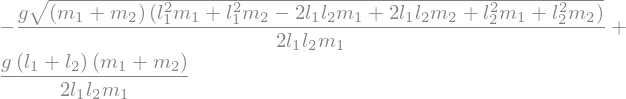

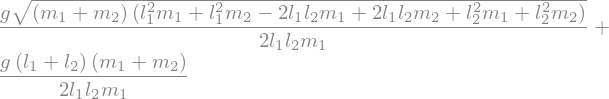

In [42]:
display(VectProp[0][0])
display(VectProp[1][0])

Pour les vecteurs propres :

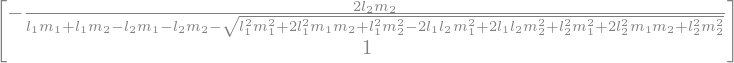

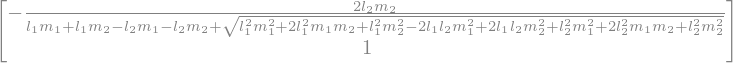

In [43]:
display(VectProp[0][2][0])
display(VectProp[1][2][0])

## Equation du mouvement

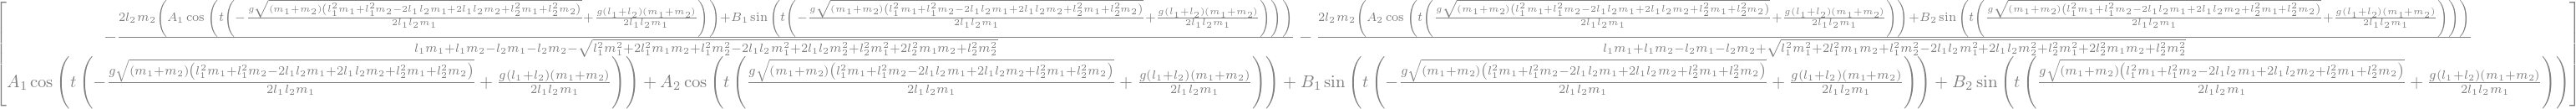

In [45]:
A1, A2, B1, B2 = sp.symbols('A1, A2, B1, B2')
the=VectProp[0][2][0]*(A1*sp.cos(VectProp[0][0] * t)+B1*sp.sin(VectProp[0][0]*t))+VectProp[1][2][0]*(A2*sp.cos(VectProp[1][0]*t)+B2*sp.sin(VectProp[1][0]*t))
the

### Prise en compte des conditions initiales :
On note p1,p2 les angles des masses 1 et 2 au temps 0, et v1,v2 les vitesses des masses 1 et 2 au temps 0.

In [64]:
from ipywidgets import interactive,interact,VBox
import ipywidgets as widgets
from IPython.display import clear_output

Sortie1 = widgets.Output()
Bouton1 = widgets.Button(description='Mettre à jour',disabled=False,button_style='',tooltip='Cliquer ici',icon='fa-refresh')

def update1(val):
#    clear_output(wait=True)
#    display(p1,p2,v1,v2,Nl1,Nl2,Nm1,Nm2)
    Resolution(val)
    Affichage1(val)
    return

def Resolution(val):
    #Application numérique :
    AN={(l1,Nl1.value),(l2,Nl2.value),(m1,Nm1.value),(m2,Nm2.value),(g,9.81)}
#Calcul des valeurs et vacteurs propres de l'AN :
    global VP
    VP=(M**-1*K).subs(AN).eigenvects()
#Equation du mouvment :
    global the2
    the2=VP[0][2][0]*(A1*sp.cos(VP[0][0] * t)+B1*sp.sin(VP[0][0]*t))+VP[1][2][0]*(A2*sp.cos(VP[1][0]*t)+B2*sp.sin(VP[1][0]*t))
#Conditions aux limites :
    Resu2=sp.linsolve([the2[0].subs(t,0)-p1.value,
                  the2[1].subs(t,0)-p2.value,
                 sp.diff(the2[0],t).subs(t,0)-v1.value,
                 sp.diff(the2[1],t).subs(t,0)-v2.value],A1, A2, B1, B2)
#Application du résultats :
    the2=the2.subs([(A1,Resu2.args[0][0]), 
                  (A2,Resu2.args[0][1]), 
                  (B1,Resu2.args[0][2]), 
                  (B2,Resu2.args[0][3])])
    return

#Nombre de périodes à afficher :
Np=2

def Affichage1(val):
#Affichage des fréquences propres :
    Sortie1.clear_output(wait=True)
    #Calcul du temps  pour afficher au moins Np périodes :
    tmax=Np*2*sp.pi/sp.Min(VP[0][0],(VP[1][0]))
        
#Tracés des angles des masses M1 et M2 en fonction du temps :
    
    p = sp.plotting.plot((the2[0],(t,0,tmax)),(the2[1],(t,0,tmax)), title="Angle (rad) en fonction du temps (t)",xlabel='t', ylabel='theta',legend=True,show=False) 
    p[0].line_color = 'blue'
    p[1].line_color = 'green'
    p[0].label = 'M1'
    p[1].label = 'M2' 
    
    r = sp.symbols('r')  
    Nt=0
    u=sp.plotting.plot_parametric((r*sp.sin(the2[0].subs(t,Nt)),-r*sp.cos(the2[0].subs(t,Nt)), (r, 0, Nl1.value)),
                                      (Nl1.value*sp.sin(the2[0].subs(t,Nt))+r*sp.sin(the2[1].subs(t,Nt)),-Nl1.value*sp.cos(the2[0].subs(t,Nt))-r*sp.cos(the2[1].subs(t,Nt)),(r, 0, Nl2.value)),
                                      xlabel='x', ylabel='y',xlim=(-Nl1.value-Nl2.value,Nl1.value+Nl2.value),ylim=(-Nl1.value-Nl2.value,0),title='Position initiale',show=False)
    u[0].line_color = 'blue'
    u[1].line_color = 'green' 

    with Sortie1:
        display("Fréquences propres : "+str(sp.N(VP[0][0]**0.5/(2*sp.pi),2))+'Hz et '+str(sp.N(VP[1][0]**0.5/(2*sp.pi),2))+'Hz ')
        display('Angles des masses M1 et M2 en fonction du temps :')
        p.show()
        u.show()
    return

p1=widgets.FloatSlider(description='P1 (rad):',min=-0.5, max=0.5, step=0.05, value=0.5, continuous_update=False)
p2=widgets.FloatSlider(description='P2 (rad):',min=-0.5, max=0.5, step=0.05, value=-0.5, continuous_update=False)
v1=widgets.FloatSlider(description='V1 (rad/s):',min=-5, max=5, step=0.1, value=0, continuous_update=False)
v2=widgets.FloatSlider(description='V2 (rad/s):',min=-5, max=5, step=0.1, value=0, continuous_update=False)
Nl1=widgets.FloatSlider(description='L1 (m):',min=0.1, max=10, step=0.1, value=1, continuous_update=False)
Nl2=widgets.FloatSlider(description='L2 (m):',min=0.1, max=10, step=0.1, value=1, continuous_update=False)
Nm1=widgets.FloatSlider(description='m1 (kg):',min=0.1, max=10, step=0.1, value=1, continuous_update=False)
Nm2=widgets.FloatSlider(description='m2 (kg):',min=0.1, max=10, step=0.1, value=1, continuous_update=False)

vb=widgets.VBox([p1,p2,v1,v2,Nl1,Nl2,Nm1,Nm2,Bouton1,Sortie1])
vb.layout.align_items = 'center'
display(vb)
update1(0)
Bouton1.on_click(update1)


In [63]:
import time
Sortie2 = widgets.Output()
Bouton2 = widgets.Button(description='Animation',disabled=False,button_style='',tooltip='Cliquer ici',icon='play')

vb2=widgets.VBox([Sortie2, Bouton2])
vb2.layout.align_items = 'center'
display(vb2)
    
Nt=0
r = sp.symbols('r')  
tmax=Np*2*sp.pi/sp.Min(VP[0][0],(VP[1][0]))
q=sp.plotting.plot_parametric((r*sp.sin(the2[0].subs(t,Nt)),-r*sp.cos(the2[0].subs(t,Nt)), (r, 0, Nl1.value)),
                                      (Nl1.value*sp.sin(the2[0].subs(t,Nt))+r*sp.sin(the2[1].subs(t,Nt)),-Nl1.value*sp.cos(the2[0].subs(t,Nt))-r*sp.cos(the2[1].subs(t,Nt)),(r, 0, Nl2.value)),
                                      xlabel='x', ylabel='y',xlim=(-Nl1.value-Nl2.value,Nl1.value+Nl2.value),ylim=(-Nl1.value-Nl2.value,0),title='t='+str(sp.N(Nt,2))+'/'+str(sp.N(tmax,2))+'s',show=False)
q[0].line_color = 'blue'
q[1].line_color = 'green' 
with Sortie2:
    q.show()
    
def Anime1(val):
    for i in range(100):
        time.sleep(0.005)
        #Calcul du temps  pour afficher au moins Np périodes :
        tmax=Np*2*sp.pi/sp.Min(VP[0][0],(VP[1][0]))
        Nt=i/100*tmax
        r = sp.symbols('r')  
        q=sp.plotting.plot_parametric((r*sp.sin(the2[0].subs(t,Nt)),-r*sp.cos(the2[0].subs(t,Nt)), (r, 0, Nl1.value)),
                                      (Nl1.value*sp.sin(the2[0].subs(t,Nt))+r*sp.sin(the2[1].subs(t,Nt)),-Nl1.value*sp.cos(the2[0].subs(t,Nt))-r*sp.cos(the2[1].subs(t,Nt)),(r, 0, Nl2.value)),
                                      xlabel='x', ylabel='y',xlim=(-Nl1.value-Nl2.value,Nl1.value+Nl2.value),ylim=(-Nl1.value-Nl2.value,0),title='t='+str(sp.N(Nt,2))+'/'+str(sp.N(tmax,2))+'s',show=False)
        q[0].line_color = 'blue'
        q[1].line_color = 'green'
        Sortie2.clear_output(wait=True)
        with Sortie2:
            q.show()
    return
    
Bouton2.on_click(Anime1)